## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE
import plotly.offline as pyoff
import plotly.graph_objs as go
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
abc = pd.read_excel('/Users/boss/Desktop/Online_Retail.xlsx')
abc.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Statistical Exploration

In [3]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
abc.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [5]:
abc.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
abc.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

## Distribution Analysis

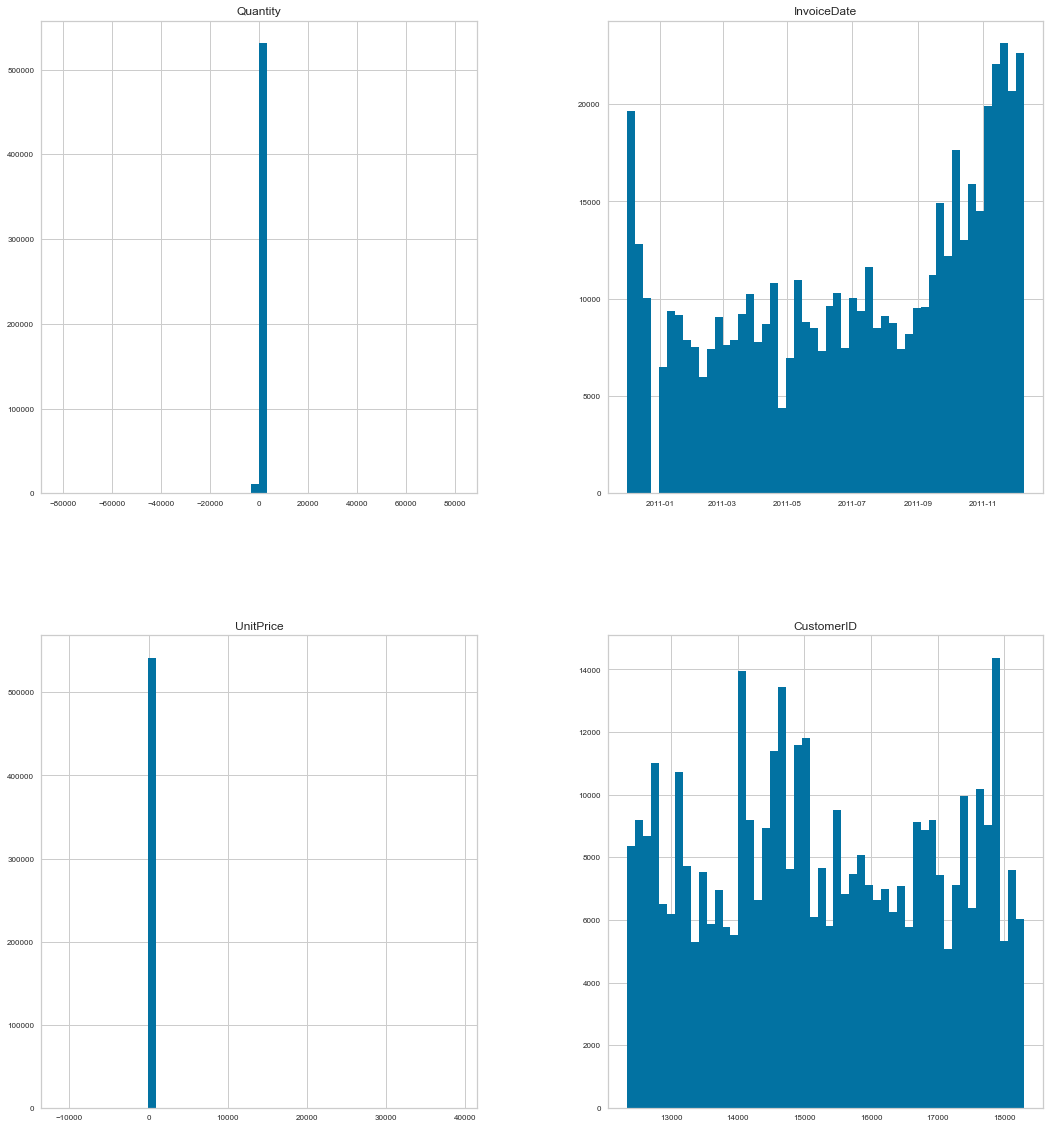

In [7]:
abc.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [8]:
abc.loc[(abc.UnitPrice<0)]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [9]:
abc.loc[(abc.Quantity<0)]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[10624 rows x 8 columns]

In [10]:
abc['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

## Transactions by countries

In [11]:
Customer_Country=abc[['Country','CustomerID']].drop_duplicates()
Customer_Country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)


Country  CustomerID
36        United Kingdom        3950
14               Germany          95
13                France          87
31                 Spain          31
3                Belgium          25
33           Switzerland          21
27              Portugal          19
19                 Italy          15
12               Finland          12
1                Austria          11
25                Norway          10
24           Netherlands           9
0              Australia           9
6        Channel Islands           9
9                Denmark           9
7                 Cyprus           8
32                Sweden           8
20                 Japan           8
26                Poland           6
34                   USA           4
5                 Canada           4
37           Unspecified           4
18                Israel           4
15                Greece           4
10                  EIRE           3
23                 Malta           2
35  United Arab Emirates           2
2                Bahrain           2
22             Lithuania           1
8         Czech Republic           1
21               Lebanon           1
28                   RSA           1
29          Saudi Arabia           1
30             Singapore           1
17               Iceland           1
4                 Brazil           1
11    European Community           1
16             Hong Kong           0

In [12]:
print("Transactions were made in", len(abc['Country'].unique().tolist()), "different countries")

Transactions were made in 38 different countries


In [13]:
print("Number of transactions where country is unspecified:", len(abc[abc['Country']=='Unspecified']))

Number of transactions where country is unspecified: 446


## Load the datset in SQLITE

In [14]:
conn = sqlite3.connect("RFMdb")
cur = conn.cursor() 
abc.to_sql("data1_set", conn)
abc = pd.read_sql('SELECT * FROM data1_set', conn)
abc

index InvoiceNo StockCode                          Description  \
0            0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   
1            1    536365     71053                  WHITE METAL LANTERN   
2            2    536365    84406B       CREAM CUPID HEARTS COAT HANGER   
3            3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE   
4            4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   
...        ...       ...       ...                                  ...   
541904  541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS   
541905  541905    581587     22899         CHILDREN'S APRON DOLLY GIRL    
541906  541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL    
541907  541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE   
541908  541908    581587     22138        BAKING SET 9 PIECE RETROSPOT    

        Quantity          InvoiceDate  UnitPrice  CustomerID         Country  
0              6  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1              6  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2              8  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3              6  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4              6  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...          ...                  ...        ...         ...             ...  
541904        12  2011-12-09 12:50:00       0.85     12680.0          France  
541905         6  2011-12-09 12:50:00       2.10     12680.0          France  
541906         4  2011-12-09 12:50:00       4.15     12680.0          France  
541907         4  2011-12-09 12:50:00       4.15     12680.0          France  
541908         3  2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 9 columns]

## Changes in Date and Description columns

In [15]:
abc['InvoiceDate'] = pd.to_datetime(abc['InvoiceDate'])
abc['InvoiceYearMonth'] = abc['InvoiceDate'].map(lambda date: 100*date.year + date.month)
abc['Date'] = abc['InvoiceDate'].dt.strftime('%Y-%m')

In [16]:
abc.head()

index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date  
0            201012  2010-12  
1            201012  2010-12  
2            201012  2010-12  
3            201012  2010-12  
4            201012  2010-12

In [17]:
#Removed the extra spaces in the beginning of the Description column
abc['Description'] =abc['Description'].str.strip() 
abc.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'InvoiceYearMonth',
       'Date'],
      dtype='object')

## Correlation Analysis

In [18]:
abc1 = abc
abc1.head()


index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date  
0            201012  2010-12  
1            201012  2010-12  
2            201012  2010-12  
3            201012  2010-12  
4            201012  2010-12

In [19]:
abc1 = abc1.drop(labels=['index', 'InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'CustomerID','Country', 'Date'], axis=1)
abc1

Quantity  UnitPrice  InvoiceYearMonth
0              6       2.55            201012
1              6       3.39            201012
2              8       2.75            201012
3              6       3.39            201012
4              6       3.39            201012
...          ...        ...               ...
541904        12       0.85            201112
541905         6       2.10            201112
541906         4       4.15            201112
541907         4       4.15            201112
541908         3       4.95            201112

[541909 rows x 3 columns]

<AxesSubplot:>

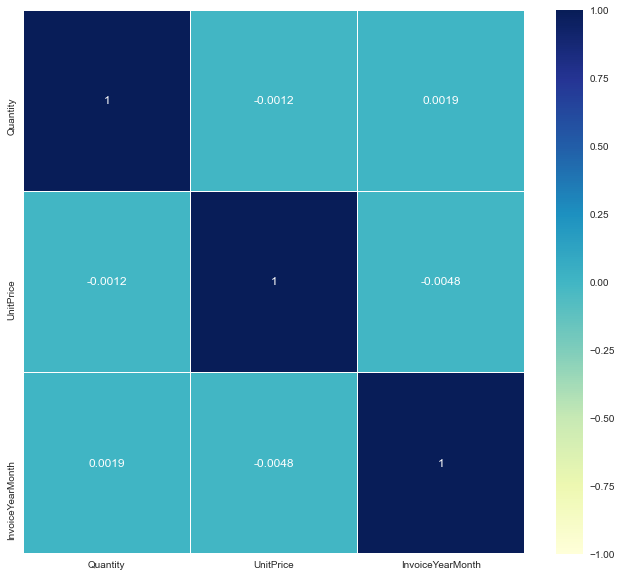

In [20]:
plt.figure(figsize =(10,10))
sns.heatmap(abc1.corr(), annot=True, cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)

In [21]:
abc.head()

index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date  
0            201012  2010-12  
1            201012  2010-12  
2            201012  2010-12  
3            201012  2010-12  
4            201012  2010-12

## Data Visualisation

### Number of orders in 2011 (with Date and Quantity attribute)

In [22]:
abc_totalprice1 = abc.groupby(['Date',]) ['Quantity'].sum().reset_index()
abc_totalprice1.head()
plot_data = [
    go.Scatter(
        x=abc_totalprice1['Date'],
        y=abc_totalprice1['Quantity'],
        mode='lines+markers',
     
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Number of orders in 2011'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


### Monthly Revenue Visualisation (with attribute Revenue and invoiceyearMonth)

In [23]:
abc['Revenue']= abc['UnitPrice'] * abc['Quantity']

abc_totalprice = abc.groupby(['InvoiceYearMonth',]) ['Revenue'].sum().reset_index()
abc_totalprice.head()

InvoiceYearMonth     Revenue
0            201012  748957.020
1            201101  560000.260
2            201102  498062.650
3            201103  683267.080
4            201104  493207.121

In [24]:
plot_data = [
    go.Scatter(
        x=abc_totalprice['InvoiceYearMonth'],
        y=abc_totalprice['Revenue'],
        mode='lines+markers'
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [25]:
abc.head()

index InvoiceNo StockCode                          Description  Quantity  \
0      0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      1    536365     71053                  WHITE METAL LANTERN         6   
2      2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth     Date  Revenue  
0            201012  2010-12    15.30  
1            201012  2010-12    20.34  
2            201012  2010-12    22.00  
3            201012  2010-12    20.34  
4            201012  2010-12    20.34

### The most sales makes United Kingdom (Visualization)

In [26]:
plot6 = pd.DataFrame(abc.groupby(['Country'])['Revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['Revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(abc.groupby(['Country'])['Revenue'].count()).reset_index()
plot7 = plot7.sort_values(['Revenue']).reset_index(drop=True)

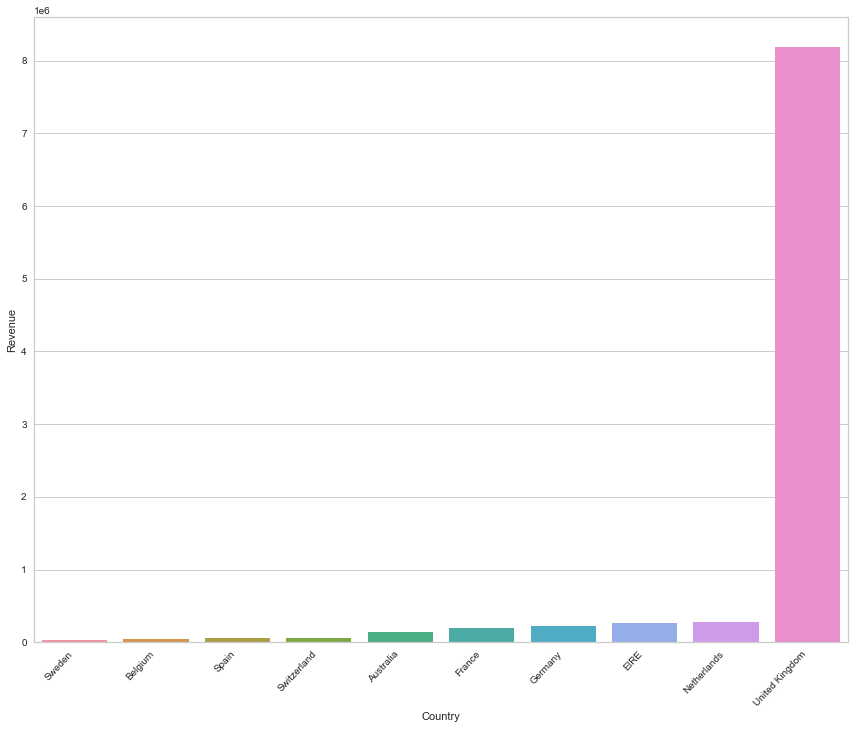

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## Countries by number of orders:

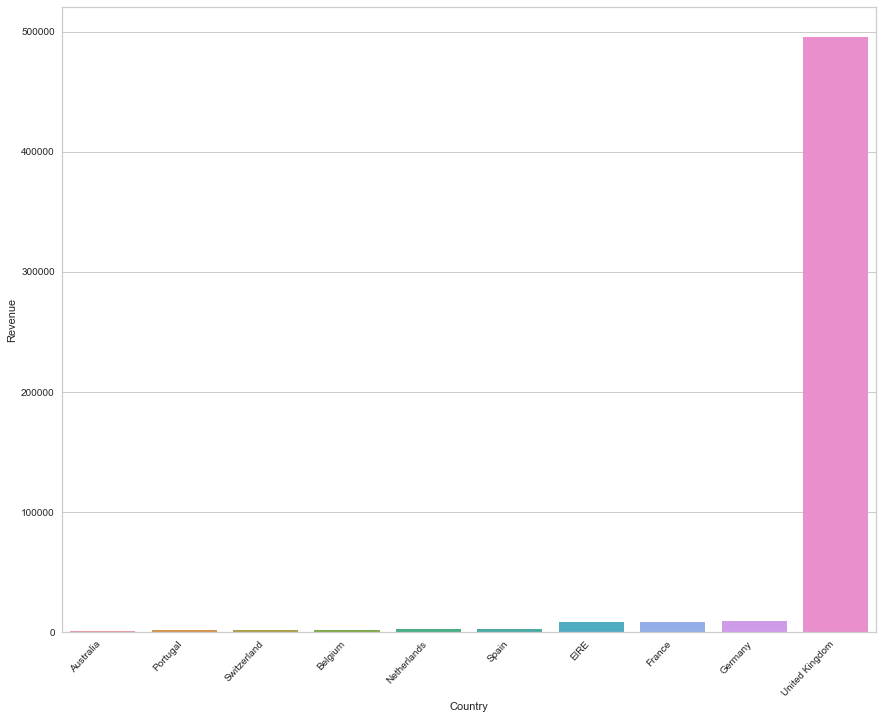

In [28]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Country', y='Revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

## Clean the data with SQL query

In [29]:
cleandata1_set= pd.read_sql(''' SELECT CustomerID,
                   InvoiceDate AS Date,
                   COUNT(*) AS count_order,
                   SUM(UnitPrice*Quantity) AS TotalPrice
            FROM data1_set
            WHERE InvoiceNo NOT LIKE '%C%'
            AND CustomerID IS NOT NULL
            AND UnitPrice != 0
            GROUP BY CustomerID ''', conn)


In [30]:
# Write clean CRM data into the database
cleandata1_set.to_sql("cleandata1_set", conn)

In [31]:
# CHECK IF DATA INSERTED INTO data/RFMdb
cleandata1_set = pd.read_sql('SELECT * FROM cleandata1_set', conn)
cleandata1_set

index  CustomerID                 Date  count_order  TotalPrice
0         0     12346.0  2011-01-18 10:01:00            1    77183.60
1         1     12347.0  2010-12-07 14:57:00          182     4310.00
2         2     12348.0  2010-12-16 19:09:00           31     1797.24
3         3     12349.0  2011-11-21 09:51:00           73     1757.55
4         4     12350.0  2011-02-02 16:01:00           17      334.40
...     ...         ...                  ...          ...         ...
4333   4333     18280.0  2011-03-07 09:52:00           10      180.60
4334   4334     18281.0  2011-06-12 10:53:00            7       80.82
4335   4335     18282.0  2011-08-05 13:35:00           12      178.05
4336   4336     18283.0  2011-01-06 14:14:00          756     2094.88
4337   4337     18287.0  2011-05-22 10:39:00           70     1837.28

[4338 rows x 5 columns]

## calculate RFM Values

In [32]:
#clean the data and calculate rfm values
abc= pd.read_sql(''' SELECT CustomerID, Recency, Frequency, Monetary, rfm_recency, rfm_frequency, rfm_monetary, rfm_recency*100 + rfm_frequency*10 + rfm_monetary AS rfm_combined
    FROM 
     ( SELECT CustomerID, 
     
     
             Date AS Recency,
             count_order AS Frequency,
             TotalPrice AS Monetary,
             NTILE(6) OVER (ORDER BY Date) AS rfm_recency,
             NTILE(6) OVER (ORDER BY count_order) AS rfm_frequency,
             NTILE(6) OVER (ORDER BY TotalPrice) AS rfm_monetary
      FROM 
            cleandata1_set
            ) 
''', conn)


In [33]:
abc.isnull().sum()

CustomerID       0
Recency          0
Frequency        0
Monetary         0
rfm_recency      0
rfm_frequency    0
rfm_monetary     0
rfm_combined     0
dtype: int64

In [34]:
abc.head()

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
0     17850.0  2010-12-01 08:26:00        297   5391.21            1   
1     13047.0  2010-12-01 08:34:00        172   3237.54            1   
2     12583.0  2010-12-01 08:45:00        247   7281.38            1   
3     13748.0  2010-12-01 09:00:00         28    948.25            1   
4     15100.0  2010-12-01 09:09:00          3    876.00            1   

   rfm_frequency  rfm_monetary  rfm_combined  
0              6             6           166  
1              6             6           166  
2              6             6           166  
3              3             4           134  
4              1             4           114

In [35]:
abc.shape

(4338, 8)

## RFM Segmentation

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def rfm_level(abc):
    if ((abc['rfm_recency'] >= 4) and (abc['rfm_frequency'] >= 4) 
        and (abc['rfm_monetary'] >= 4)):
        return 'Best Customers'
    elif ((abc['rfm_recency'] >= 3) and (abc['rfm_frequency'] >= 3)
          and (abc['rfm_monetary'] >= 3)):
        return 'Loyal'
    elif ((abc['rfm_recency'] >= 3) and (abc['rfm_frequency'] >= 1)
          and (abc['rfm_monetary'] >= 2)):
        return 'Potential Loyalist'
    elif ((abc['rfm_recency'] >= 3) and (abc['rfm_frequency'] >= 1)
          and (abc['rfm_monetary'] >= 1)):
        return 'Promising'
    elif ((abc['rfm_recency'] >= 2) and (abc['rfm_frequency'] >= 2)
          and (abc['rfm_monetary'] >= 2)):
        return 'Customers Needing Attention'
    elif ((abc['rfm_recency'] >= 1) and (abc['rfm_frequency'] >= 2)
          and (abc['rfm_monetary'] >= 2)):
        return 'At Risk'
    elif ((abc['rfm_recency'] >= 1) and (abc['rfm_frequency'] >= 1)
          and (abc['rfm_monetary'] >= 2)):
        return 'Hibernating'
    else:
        return 'Lost'

    #Create a new variable rfm_level    
abc['rfm_level'] = abc.apply(rfm_level, axis=1)
abc.head()

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
0     17850.0  2010-12-01 08:26:00        297   5391.21            1   
1     13047.0  2010-12-01 08:34:00        172   3237.54            1   
2     12583.0  2010-12-01 08:45:00        247   7281.38            1   
3     13748.0  2010-12-01 09:00:00         28    948.25            1   
4     15100.0  2010-12-01 09:09:00          3    876.00            1   

   rfm_frequency  rfm_monetary  rfm_combined    rfm_level  
0              6             6           166      At Risk  
1              6             6           166      At Risk  
2              6             6           166      At Risk  
3              3             4           134      At Risk  
4              1             4           114  Hibernating

## Identification and correct justification of business value Customer Segments:

In [37]:
abc[abc['rfm_level'] == 'Best Customers'].sort_values('Monetary', ascending=False).head(10)

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
3308     14096.0  2011-08-30 10:49:00       5111  65164.79            5   
3752     12536.0  2011-10-11 14:52:00        261  12601.83            6   
2807     12409.0  2011-06-10 12:19:00        109  11072.67            4   
2268     15251.0  2011-04-12 10:38:00        111  10484.99            4   
2565     12590.0  2011-05-12 14:46:00         68   9864.26            4   
4213     18139.0  2011-11-21 14:06:00        159   8438.34            6   
2572     12757.0  2011-05-12 19:01:00        371   7857.10            4   
2277     16729.0  2011-04-12 14:22:00        660   7239.92            4   
4045     12357.0  2011-11-06 16:07:00        131   6207.67            6   
3701     17509.0  2011-10-07 13:14:00        366   6115.14            6   

      rfm_frequency  rfm_monetary  rfm_combined       rfm_level  
3308              6             6           566  Best Customers  
3752              6             6           666  Best Customers  
2807              5             6           456  Best Customers  
2268              5             6           456  Best Customers  
2565              4             6           446  Best Customers  
4213              6             6           666  Best Customers  
2572              6             6           466  Best Customers  
2277              6             6           466  Best Customers  
4045              5             6           656  Best Customers  
3701              6             6           666  Best Customers

In [38]:
abc[abc['rfm_level'] == 'Loyal'].sort_values('Monetary', ascending=False).head(10)

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
1871     12901.0  2011-03-14 10:41:00        116  17654.54            3   
2023     14607.0  2011-03-23 15:22:00         86  16569.50            3   
1451     12477.0  2011-02-11 12:45:00        300  13219.74            3   
1869     15125.0  2011-03-14 09:59:00        127  11528.48            3   
1573     14895.0  2011-02-22 13:08:00        498  11138.71            3   
1768     17107.0  2011-03-06 15:17:00        418  10815.43            3   
1796     13340.0  2011-03-08 11:39:00        134  10736.48            3   
1605     17139.0  2011-02-24 09:32:00        478  10668.47            3   
2137     16180.0  2011-04-01 10:23:00        162  10254.18            3   
1804     14367.0  2011-03-08 14:12:00        524   9261.52            3   

      rfm_frequency  rfm_monetary  rfm_combined rfm_level  
1871              5             6           356     Loyal  
2023              5             6           356     Loyal  
1451              6             6           366     Loyal  
1869              5             6           356     Loyal  
1573              6             6           366     Loyal  
1768              6             6           366     Loyal  
1796              5             6           356     Loyal  
1605              6             6           366     Loyal  
2137              6             6           366     Loyal  
1804              6             6           366     Loyal

In [39]:
abc[abc['rfm_level'] == 'Potential Loyalist'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency   Monetary  rfm_recency  \
2604     16446.0  2011-05-18 09:52:00          3  168472.50            4   
2810     15098.0  2011-06-10 15:22:00          3   39916.50            4   
4328     16000.0  2011-12-07 12:14:00          9   12393.70            6   
2905     12798.0  2011-06-22 10:11:00          8    6977.04            5   
3406     18251.0  2011-09-13 15:03:00         16    4314.72            5   

      rfm_frequency  rfm_monetary  rfm_combined           rfm_level  
2604              1             6           416  Potential Loyalist  
2810              1             6           416  Potential Loyalist  
4328              1             6           616  Potential Loyalist  
2905              1             6           516  Potential Loyalist  
3406              2             6           526  Potential Loyalist

In [40]:
abc[abc['rfm_level'] == 'Promising'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
2065     14476.0  2011-03-27 15:39:00         19    215.70            3   
3436     16189.0  2011-09-15 15:21:00         11    215.48            5   
3962     16190.0  2011-10-30 15:59:00          6    215.08            6   
1993     12831.0  2011-03-22 13:02:00          9    215.05            3   
3972     12588.0  2011-10-31 15:01:00         10    214.90            6   

      rfm_frequency  rfm_monetary  rfm_combined  rfm_level  
2065              2             1           321  Promising  
3436              1             1           511  Promising  
3962              1             1           611  Promising  
1993              1             1           311  Promising  
3972              1             1           611  Promising

In [41]:
abc[abc['rfm_level'] == 'Customers Needing Attention'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency   Monetary  rfm_recency  \
846      14646.0  2010-12-20 10:09:00       2076  280206.02            2   
914      12415.0  2011-01-06 11:12:00        714  124914.53            2   
802      16684.0  2010-12-16 17:34:00        277   66653.56            2   
1146     14088.0  2011-01-21 13:07:00        589   50491.81            2   
816      12931.0  2010-12-17 09:45:00         82   42055.96            2   

      rfm_frequency  rfm_monetary  rfm_combined                    rfm_level  
846               6             6           266  Customers Needing Attention  
914               6             6           266  Customers Needing Attention  
802               6             6           266  Customers Needing Attention  
1146              6             6           266  Customers Needing Attention  
816               5             6           256  Customers Needing Attention

In [42]:
abc[abc['rfm_level'] == 'At Risk'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency   Monetary  rfm_recency  \
421     18102.0  2010-12-07 16:42:00        431  259657.30            1   
374     17450.0  2010-12-07 09:23:00        337  194550.79            1   
65      14911.0  2010-12-01 14:05:00       5675  143825.06            1   
201     14156.0  2010-12-03 11:48:00       1400  117379.63            1   
15      17511.0  2010-12-01 10:19:00        963   91062.38            1   

     rfm_frequency  rfm_monetary  rfm_combined rfm_level  
421              6             6           166   At Risk  
374              6             6           166   At Risk  
65               6             6           166   At Risk  
201              6             6           166   At Risk  
15               6             6           166   At Risk

In [43]:
abc[abc['rfm_level'] == 'Hibernating'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
1104     12346.0  2011-01-18 10:01:00          1  77183.60            2   
1007     15749.0  2011-01-11 12:55:00         10  44534.30            2   
904      16532.0  2011-01-05 12:37:00          4   6748.80            2   
167      15299.0  2010-12-02 16:48:00          7   4507.01            1   
520      12755.0  2010-12-09 10:44:00          4   3811.95            1   

      rfm_frequency  rfm_monetary  rfm_combined    rfm_level  
1104              1             6           216  Hibernating  
1007              1             6           216  Hibernating  
904               1             6           216  Hibernating  
167               1             6           116  Hibernating  
520               1             6           116  Hibernating

In [44]:
abc[abc['rfm_level'] == 'Lost'].sort_values('Monetary', ascending=False).head(5)

CustomerID              Recency  Frequency  Monetary  rfm_recency  \
1187     15052.0  2011-01-24 15:52:00         30    215.78            2   
791      17580.0  2010-12-16 15:27:00         45    215.72            2   
546      16519.0  2010-12-09 14:08:00         13    215.08            1   
278      16411.0  2010-12-05 13:26:00         45    214.65            1   
102      17855.0  2010-12-02 09:44:00         17    208.97            1   

      rfm_frequency  rfm_monetary  rfm_combined rfm_level  
1187              3             1           231      Lost  
791               4             1           241      Lost  
546               2             1           121      Lost  
278               4             1           141      Lost  
102               2             1           121      Lost

In [45]:
# Calculate total customers in each segment
rfm_agg = abc.groupby('rfm_level').agg({'CustomerID':'count'})
print(rfm_agg)

                             CustomerID
rfm_level                              
At Risk                             641
Best Customers                      591
Customers Needing Attention         609
Hibernating                          66
Lost                                130
Loyal                               867
Potential Loyalist                  841
Promising                           593


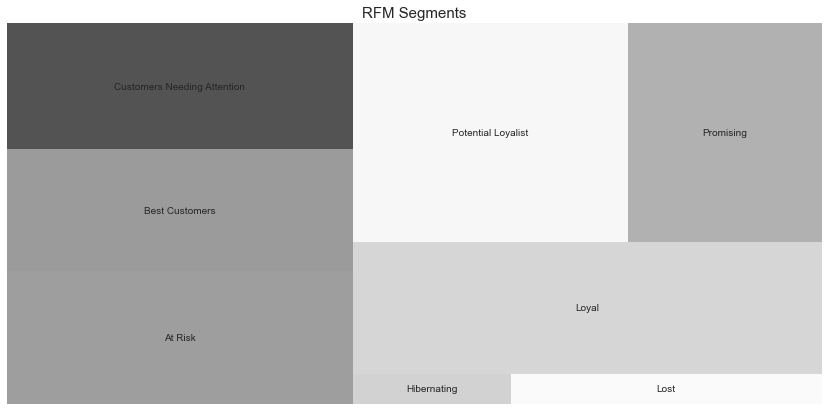

In [46]:
#RFM visualization
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13, 7)
squarify.plot(sizes=rfm_agg['CustomerID'], 
              label=['At Risk',
                     'Best Customers',
                     'Customers Needing Attention',
                     'Hibernating',
                     'Lost', 
                     'Loyal', 
                     'Potential Loyalist',
                     'Promising'], alpha=0.7)
plt.title("RFM Segments",fontsize=15)
plt.axis('off')
plt.show()


## Find Recency

In [47]:
NOW = dt.date(2011,12,9) 
abc['Date'] = pd.DatetimeIndex(abc.Recency).date

In [48]:
#Creating RFM
RFM_Table1 = abc.groupby(['CustomerID' ],as_index=False)['Date'].max()
RFM_Table1.columns = ['CustomerID','Last_Purchase_Date']
RFM_Table1['Recency'] = RFM_Table1.Last_Purchase_Date.apply(lambda x:(NOW-x).days)
RFM_Table1.head()



CustomerID Last_Purchase_Date  Recency
0     12346.0         2011-01-18      325
1     12347.0         2010-12-07      367
2     12348.0         2010-12-16      358
3     12349.0         2011-11-21       18
4     12350.0         2011-02-02      310

## Merging Recency with other columns

In [49]:
RFM_Table = pd.merge(RFM_Table1, abc, on='CustomerID', how='inner')
RFM_Table.columns = ['index','CustomerID','Recency', 'Last_Purchase_Date', 'Frequency', 'Monetary', 'rfm_recency', 'rfm_frequency', 'rfm_monetary', 'rfm_combined', 'rfm_level','Date']
RFM_Table

index  CustomerID  Recency   Last_Purchase_Date  Frequency  Monetary  \
0     12346.0  2011-01-18      325  2011-01-18 10:01:00          1  77183.60   
1     12347.0  2010-12-07      367  2010-12-07 14:57:00        182   4310.00   
2     12348.0  2010-12-16      358  2010-12-16 19:09:00         31   1797.24   
3     12349.0  2011-11-21       18  2011-11-21 09:51:00         73   1757.55   
4     12350.0  2011-02-02      310  2011-02-02 16:01:00         17    334.40   
...       ...         ...      ...                  ...        ...       ...   
4333  18280.0  2011-03-07      277  2011-03-07 09:52:00         10    180.60   
4334  18281.0  2011-06-12      180  2011-06-12 10:53:00          7     80.82   
4335  18282.0  2011-08-05      126  2011-08-05 13:35:00         12    178.05   
4336  18283.0  2011-01-06      337  2011-01-06 14:14:00        756   2094.88   
4337  18287.0  2011-05-22      201  2011-05-22 10:39:00         70   1837.28   

      rfm_recency  rfm_frequency  rfm_monetary  rfm_combined  \
0               2              1             6           216   
1               1              6             6           166   
2               2              3             5           235   
3               6              4             5           645   
4               2              2             2           222   
...           ...            ...           ...           ...   
4333            3              1             1           311   
4334            4              1             1           411   
4335            5              2             1           521   
4336            2              6             5           265   
4337            4              4             5           445   

                        rfm_level        Date  
0                     Hibernating  2011-01-18  
1                         At Risk  2010-12-07  
2     Customers Needing Attention  2010-12-16  
3                  Best Customers  2011-11-21  
4     Customers Needing Attention  2011-02-02  
...                           ...         ...  
4333                    Promising  2011-03-07  
4334                    Promising  2011-06-12  
4335                    Promising  2011-08-05  
4336  Customers Needing Attention  2011-01-06  
4337               Best Customers  2011-05-22  

[4338 rows x 12 columns]

## Drop all Columns except Recency, Frequency and Monetary

In [50]:
RFM_Table2 = RFM_Table.drop(labels=['index','CustomerID','Last_Purchase_Date', 'rfm_recency', 'rfm_frequency', 'rfm_monetary', 'rfm_combined', 'rfm_level','Date'], axis=1) #drop all and 
RFM_Table2


Recency  Frequency  Monetary
0         325          1  77183.60
1         367        182   4310.00
2         358         31   1797.24
3          18         73   1757.55
4         310         17    334.40
...       ...        ...       ...
4333      277         10    180.60
4334      180          7     80.82
4335      126         12    178.05
4336      337        756   2094.88
4337      201         70   1837.28

[4338 rows x 3 columns]

## Normalization

In [51]:
mms = MinMaxScaler()

rfm_data_cluster = RFM_Table2[['Recency', 'Frequency', 'Monetary']]

rfm_data_scaled = mms.fit_transform(rfm_data_cluster)
rfm_data_scaled = pd.DataFrame(rfm_data_scaled, columns=['Recency', 'Frequency', 'Monetary'])    
rfm_data_scaled.head()

Recency  Frequency  Monetary
0  0.871314   0.000000  0.275443
1  0.983914   0.023069  0.015368
2  0.959786   0.003824  0.006401
3  0.048257   0.009177  0.006259
4  0.831099   0.002039  0.001180

## Finding K using Elbow method

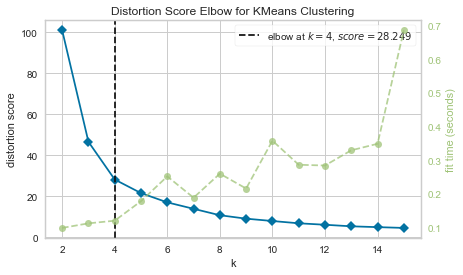

In [52]:
# finding best K using elbow method

km = KMeans()
elbow = KElbowVisualizer(estimator = km, k = 15)
elbow.fit(rfm_data_scaled)
elbow.show()

plt.show()

In [53]:
km = KMeans(n_clusters = 4, random_state = 42)
clusters = km.fit_predict(rfm_data_scaled)
rfm_data_scaled['cluster'] = clusters
rfm_data_scaled

Recency  Frequency  Monetary  cluster
0     0.871314   0.000000  0.275443        2
1     0.983914   0.023069  0.015368        2
2     0.959786   0.003824  0.006401        2
3     0.048257   0.009177  0.006259        1
4     0.831099   0.002039  0.001180        0
...        ...        ...       ...      ...
4333  0.742627   0.001147  0.000631        0
4334  0.482574   0.000765  0.000275        3
4335  0.337802   0.001402  0.000622        3
4336  0.903485   0.096227  0.007463        2
4337  0.538874   0.008794  0.006544        3

[4338 rows x 4 columns]

## Silhouette score

In [54]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6]


for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    p = cluster.fit_predict(rfm_data_scaled)
    score = silhouette_score(rfm_data_scaled, p, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.6914901060681258)
For n_clusters = 3, silhouette score is 0.785869364184688)
For n_clusters = 4, silhouette score is 0.9241553572654416)
For n_clusters = 5, silhouette score is 0.8389348922616919)
For n_clusters = 6, silhouette score is 0.7829848549734632)


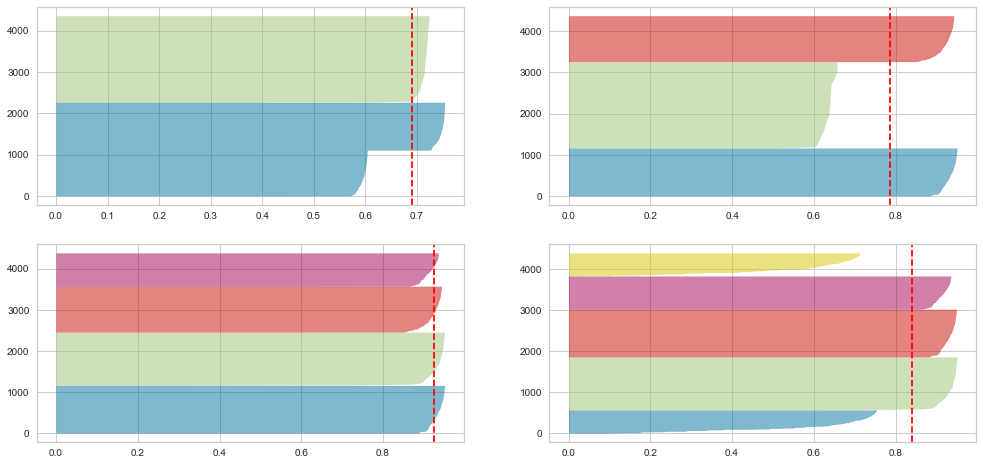

In [55]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  
   ## Create KMeans instance for different number of clusters
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    ##$Create SilhouetteVisualizer instance with KMeans instance
    #Fit the visualizer
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(rfm_data_scaled)


## Analysis with 3,4 and 5 clusters (t-SNE)

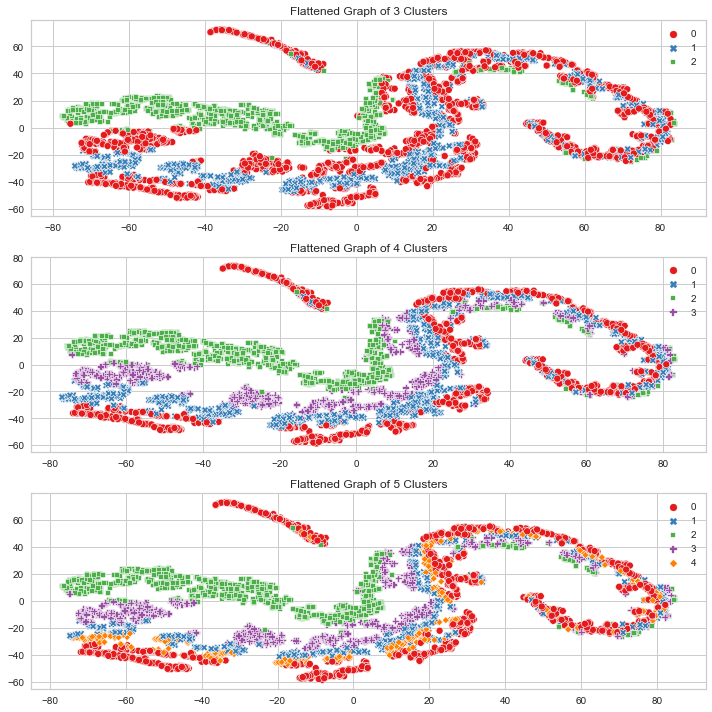

In [56]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(rfm_data_scaled, 3, RFM_Table2)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(rfm_data_scaled, 4, RFM_Table2)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(rfm_data_scaled, 5, RFM_Table2)
plt.tight_layout()

## 3D segmentation of all  the segmented customers

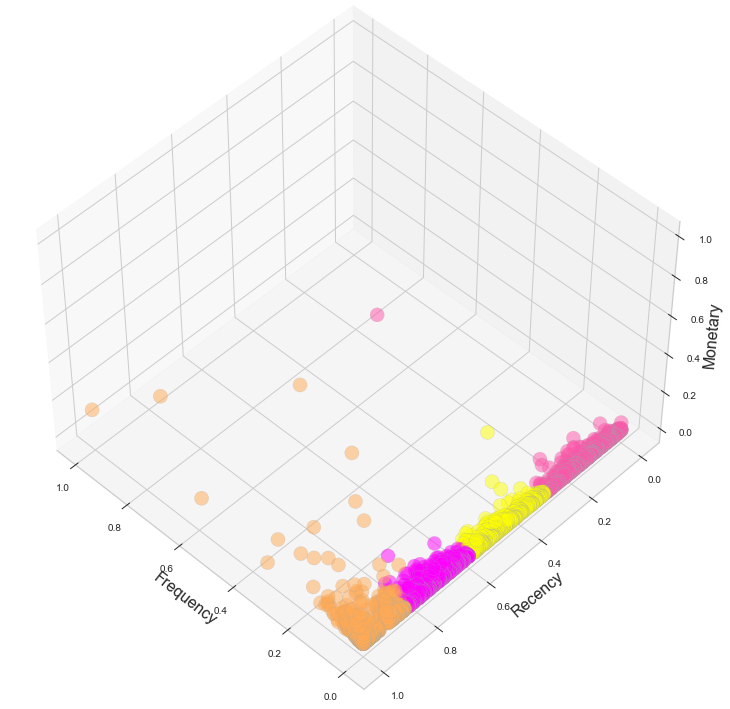

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig,
            rect = [0, 0, .95, 1],
            elev = 48,
            azim = 134)
plt.cla()
ax.scatter(rfm_data_scaled['Frequency'], rfm_data_scaled['Recency'],rfm_data_scaled['Monetary'],
            c= rfm_data_scaled['cluster'],
            s= 200,
            cmap ='spring',
            alpha = 0.5,
            edgecolor ='darkgrey')
                             
ax.set_xlabel('Frequency',
              fontsize = 16)
ax.set_ylabel('Recency',
              fontsize = 16)
ax.set_zlabel('Monetary',
              fontsize = 16)

plt.show()

## Summary of Each Cluster

In [58]:
def rfm_value(rfm_data_scaled):
    df_new = rfm_data_scaled.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [59]:
rfm_value(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         353.0     168.0   4374.0  1285
1         271.0      74.0   1377.0  1149
2          55.0      48.0    694.0  1105
3         175.0      55.0   1180.0   799